In [22]:
# Decision Tree

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_excel('data/existing-customers.xlsx')

C:\Users\gta\PycharmProjects\data-mining\.venv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [61]:
def log_zero(x):
    if x == 0:
        return 0
    else:
        return np.log(x)

df = pd.read_excel('data/existing-customers.xlsx')

df['capital'] = df['capital-gain'] - df['capital-loss']

# df['capital'] = np.log(df['capital'])
df['capital'] = df['capital'].apply(log_zero)

df.drop('capital-gain', axis=1, inplace=True)
df.drop('capital-loss', axis=1, inplace=True)

df.dropna(inplace=True)

C:\Users\gta\PycharmProjects\data-mining\.venv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [26]:
df.head()

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class,capital
0,Row0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,7.684324
1,Row1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,-inf
2,Row2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,-inf
3,Row3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,-inf
4,Row4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,-inf


In [27]:
df.shape

(32561, 14)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RowID           32561 non-null  object 
 1   age             32561 non-null  int64  
 2   workclass       30725 non-null  object 
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  hours-per-week  32561 non-null  int64  
 11  native-country  31978 non-null  object 
 12  class           32561 non-null  object 
 13  capital         31042 non-null  float64
dtypes: float64(1), int64(3), object(10)
memory usage: 3.5+ MB


In [29]:
df.isnull().sum()

RowID                0
age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country     583
class                0
capital           1519
dtype: int64

In [30]:
df['class'].value_counts()

<=50K    24720
>50K      7841
Name: class, dtype: int64

In [31]:
df['class'].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: class, dtype: float64

In [32]:
df.describe()

C:\Users\gta\PycharmProjects\data-mining\.venv\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,age,education-num,hours-per-week,capital
count,32561.000000,32561.000000,32561.000000,3.104200e+04
mean,38.581647,10.080679,40.437456,-inf
std,13.640433,2.572720,12.347429,NaN
min,17.000000,1.000000,1.000000,-inf
25%,28.000000,9.000000,40.000000,NaN
50%,37.000000,10.000000,40.000000,NaN
75%,48.000000,12.000000,45.000000,NaN
max,90.000000,16.000000,99.000000,1.151292e+01


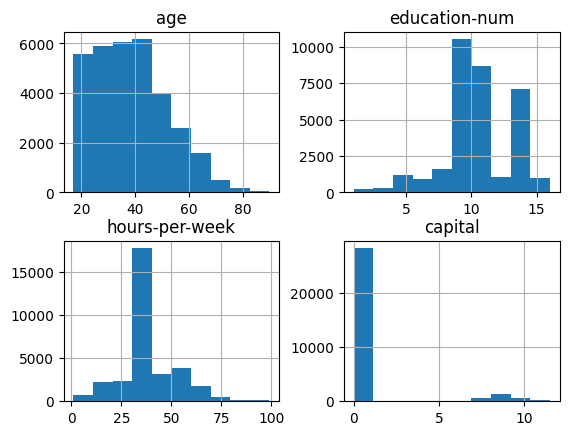

In [44]:
df.hist()
plt.show()

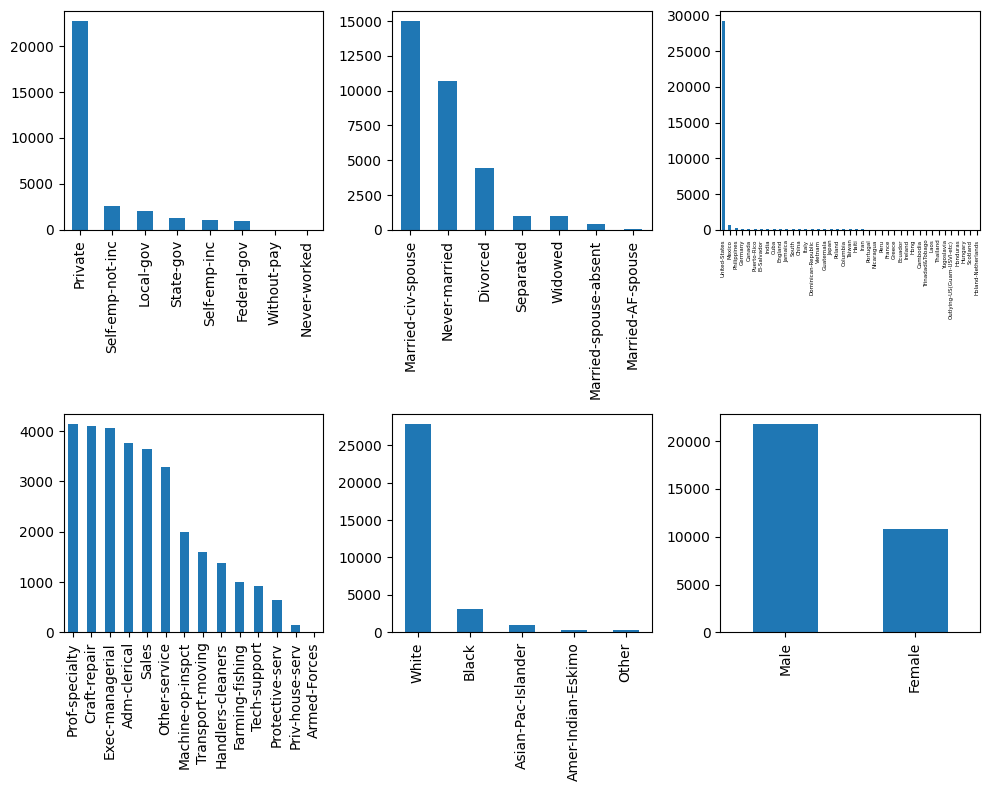

In [45]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

df['workclass'].value_counts().plot(kind='bar', ax=axs[0, 0])
df['marital-status'].value_counts().plot(kind='bar', ax=axs[0, 1])
df['occupation'].value_counts().plot(kind='bar', ax=axs[1, 0])
df['race'].value_counts().plot(kind='bar', ax=axs[1, 1])
df['native-country'].value_counts().plot(kind='bar', ax=axs[0, 2])
df['sex'].value_counts().plot(kind='bar', ax=axs[1, 2])

axs[0, 2].set_xticklabels(axs[0, 2].get_xticklabels(), fontsize=4)

plt.tight_layout()
plt.show()

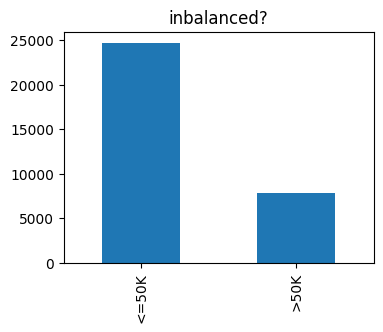

In [46]:
plt.figure(figsize=(4, 3))
df['class'].value_counts().plot(kind='bar')
plt.title('inbalanced?')
plt.show()

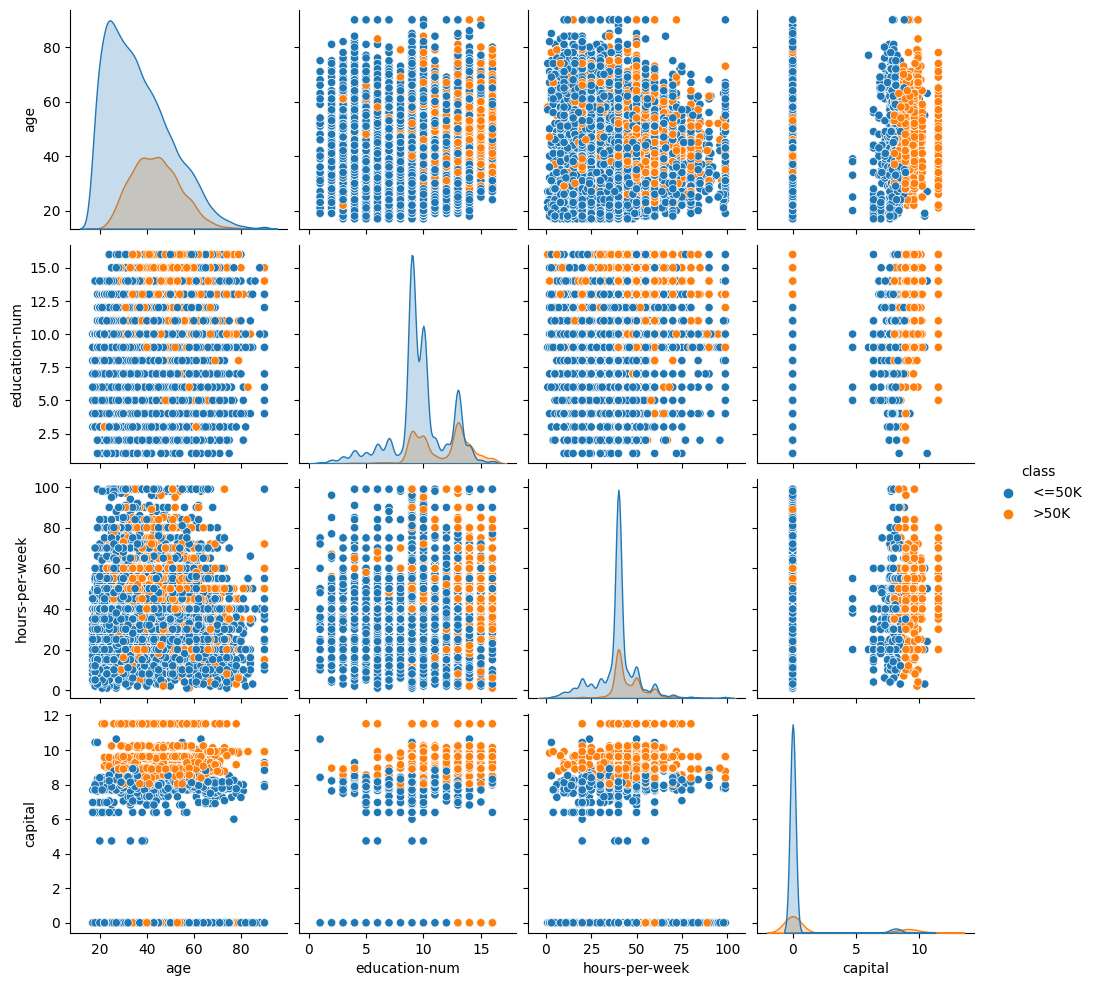

In [96]:
sns.pairplot(df, hue='class')

C:\Users\gta\AppData\Local\Temp\ipykernel_2884\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

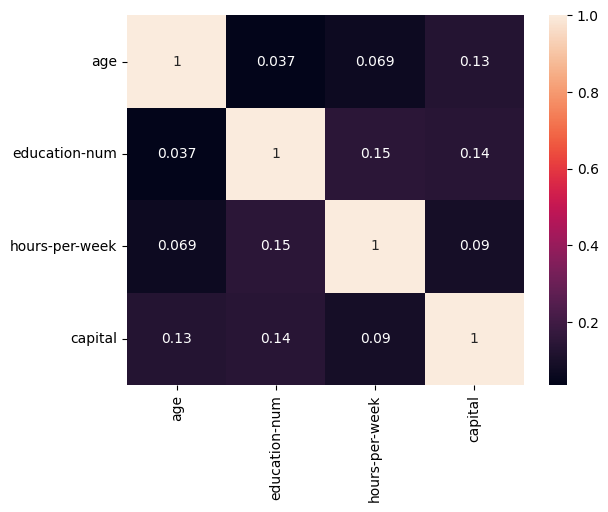

In [47]:
sns.heatmap(df.corr(), annot=True)

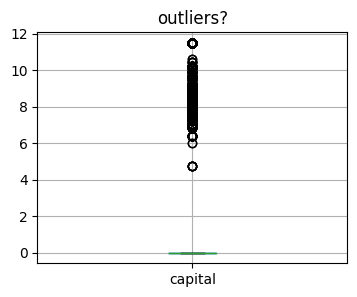

In [54]:
plt.figure(figsize=(4, 3))
df[['capital']].boxplot()
plt.title('outliers?')
plt.show()

In [69]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [97]:
features = ['age', 'education-num', 'hours-per-week', 'capital']
target = ['class']

# Split data into features and target variable
# X = df.drop('class', axis=1)
# y = df['class']

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Use the trained classifier to predict the target variable for the testing set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
confusion_matrix(y_test, y_pred)

Accuracy: 80.30%


array([[4346,    6],
       [1126,  269]], dtype=int64)

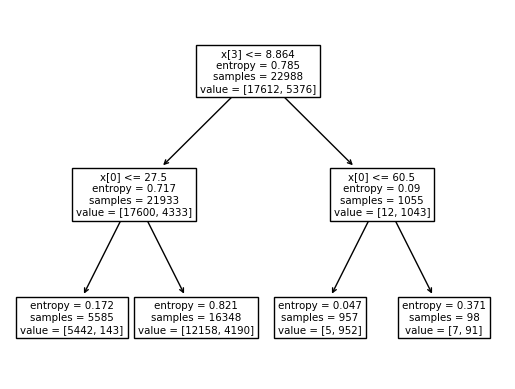

In [98]:
plot_tree(clf)
plt.savefig('welp.png')